In [19]:
!wget "https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv"

--2024-06-15 14:24:38--  https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.233.207, 108.177.14.207, 74.125.131.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.233.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211884 (207K) [application/octet-stream]
Saving to: ‘Visa_For_Lisa_Loan_Modelling.csv.1’

Visa_For_Lisa_Loan_ 100%[===================>] 206.92K   561KB/s    in 0.4s    

2024-06-15 14:24:40 (561 KB/s) - ‘Visa_For_Lisa_Loan_Modelling.csv.1’ saved [211884/211884]



In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 12.3 MB/s            


In [2]:
!pip install sklearn

  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /home/docode/.pyenv/versions/3.6.7/bin/python3.6 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-y0blzqlw/sklearn_785c1cfe36d342619114ae1ae0d8c0b8/setup.py'"'"'; __file__='"'"'/tmp/pip-install-y0blzqlw/sklearn_785c1cfe36d342619114ae1ae0d8c0b8/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-_hjzesyv
       cwd: /tmp/pip-install-y0blzqlw/sklearn_785c1cfe36d342619114ae1ae0d8c0b8/
  Complete output (15 lines):
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install sc

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Data collection

In [2]:
loan_df=pd.read_csv("Visa_For_Lisa_Loan_Modelling.csv")

# 2. Data exploration

In [3]:
#Short view on data
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Quick statistical description of data
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#Checking if number of unique value we have in "Personal Loan" column
personal_loan=np.unique(loan_df["Personal Loan"],return_counts=True)
print(personal_loan)
"""We have two type of value in the column. 0 and 1 , which represent wheter or not a bank customer take a loan"""

(array([0, 1], dtype=int64), array([4520,  480], dtype=int64))


'We have two type of value in the column. 0 and 1 , which represent wheter or not a bank customer take a loan'

# 3.Data Visualization

([<matplotlib.patches.Wedge at 0x12e80c05490>,
 [Text(-1.050350983068654, 0.3267457916587637, "Didn't took a loan"),
  Text(2.005215483929468, -0.6237875143103704, 'Took loan')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(1.527783225851023, -0.475266677569806, '9.6%')])

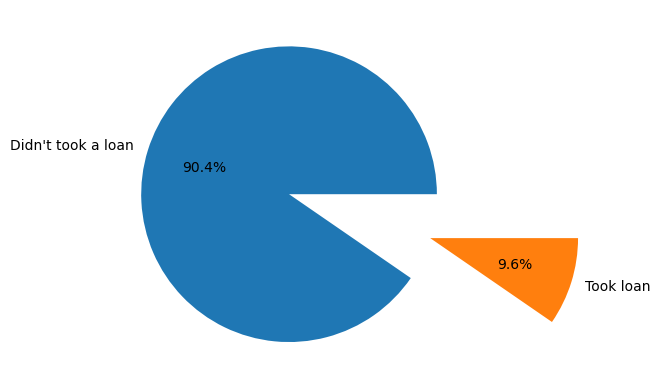

In [6]:
plt.pie(personal_loan[1],explode=[0,1],labels=["Didn't took a loan","Took loan"],autopct="%1.1f%%")

'The coorelation matrix informe us that Personal Loan variable I most cooralated with Income and CCAvg'

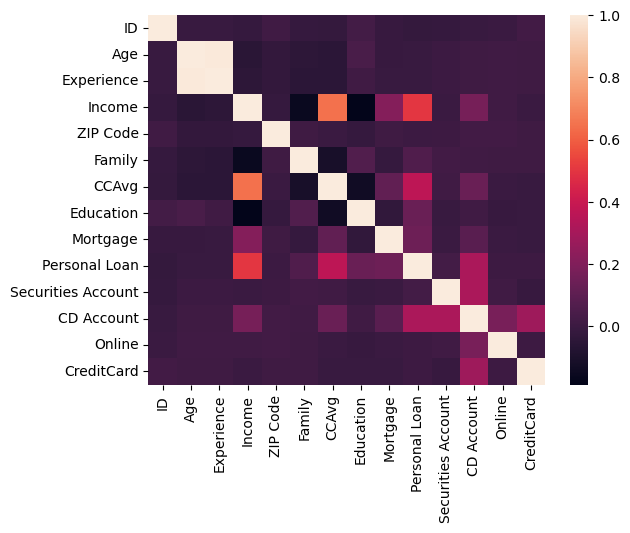

In [7]:
sns.heatmap(loan_df.corr())
"""The coorelation matrix informe us that Personal Loan variable I most cooralated with Income and CCAvg"""

'After displaying the coorelation map we saw that Age and Experience are highly cooralated. Then we decide to plot them, the displayed graphique show us that the more the client is old the more he has experience'

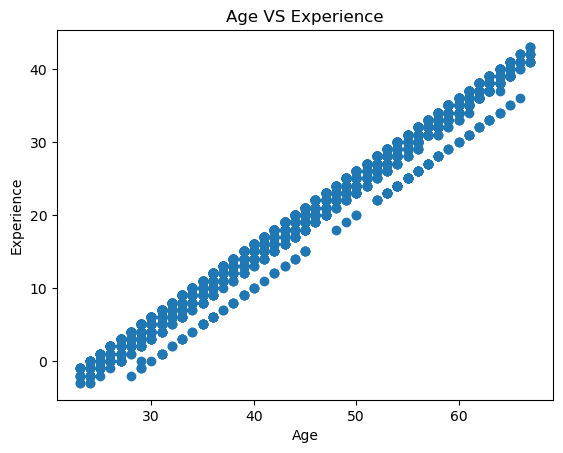

In [8]:
plt.scatter(loan_df["Age"],loan_df["Experience"])
plt.title("Age VS Experience")
plt.xlabel("Age")
plt.ylabel("Experience")
"""After displaying the coorelation map we saw that Age and Experience are highly cooralated. Then we decide to plot them, the displayed graphique show us that the more the client is old the more he has experience"""

C:\Users\judical\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\judical\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\judical\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\judical\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

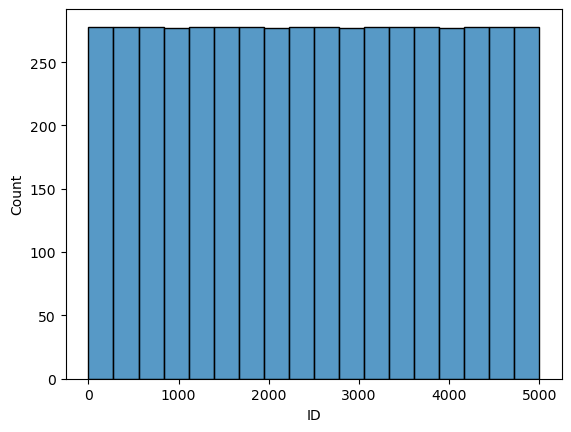

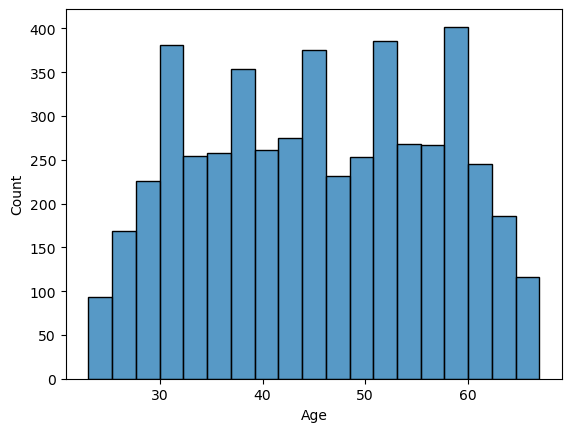

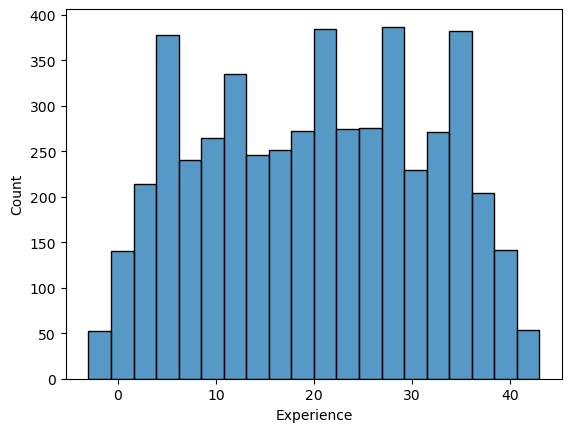

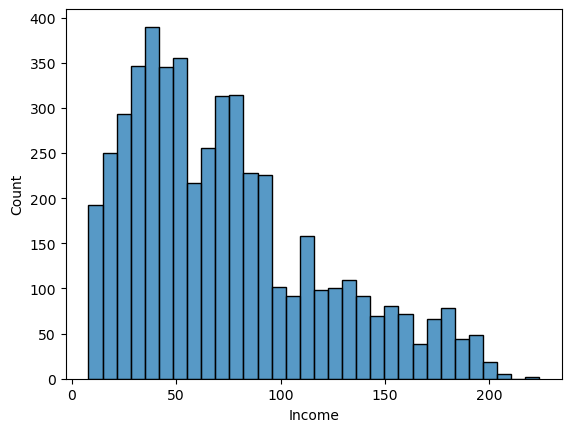

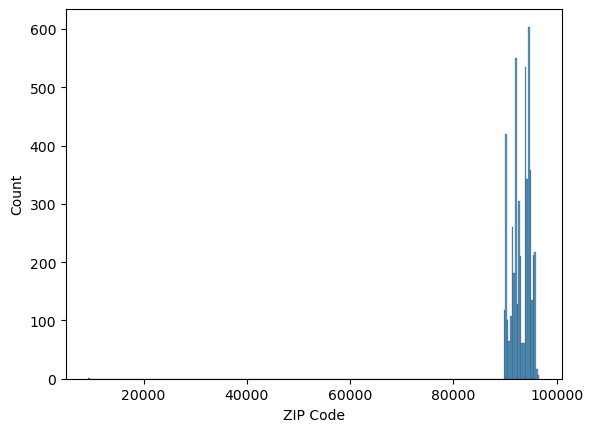

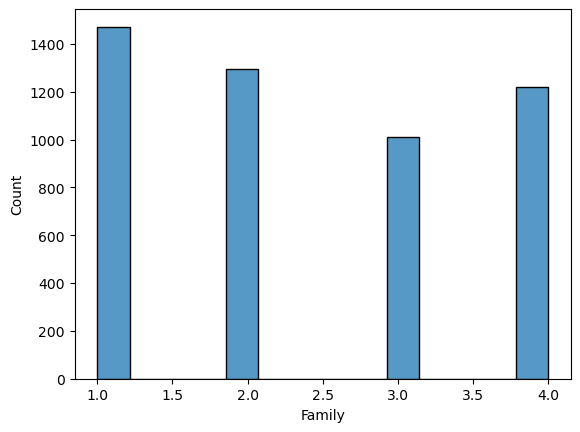

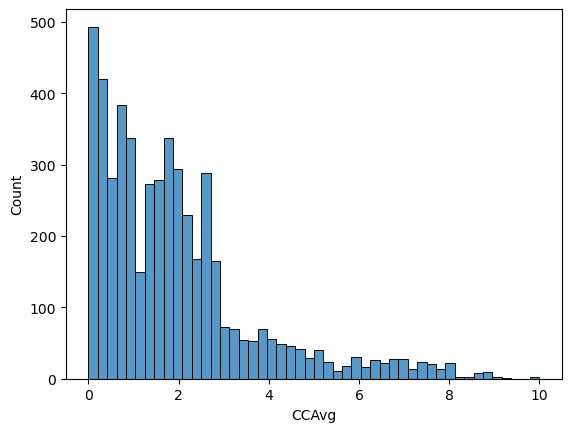

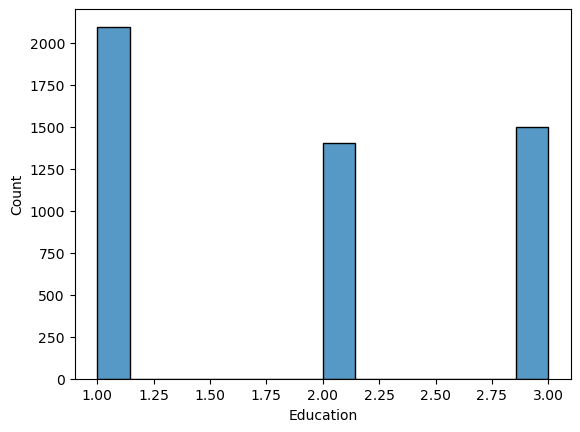

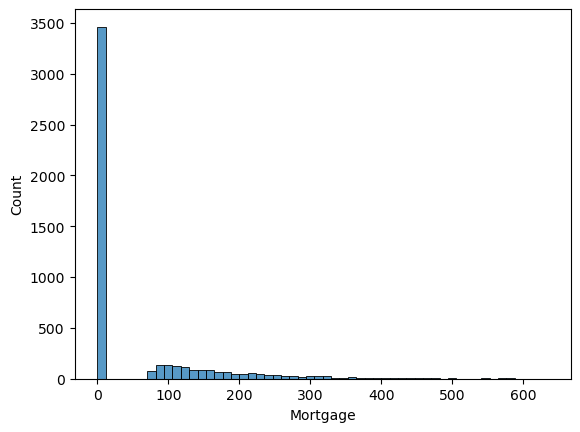

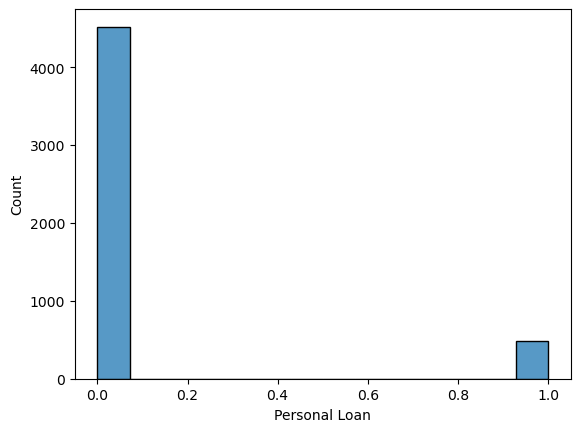

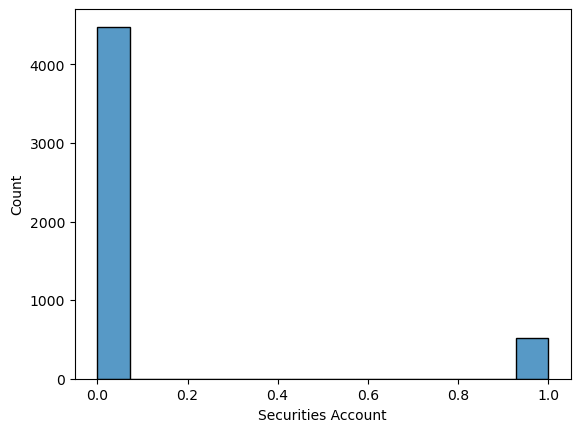

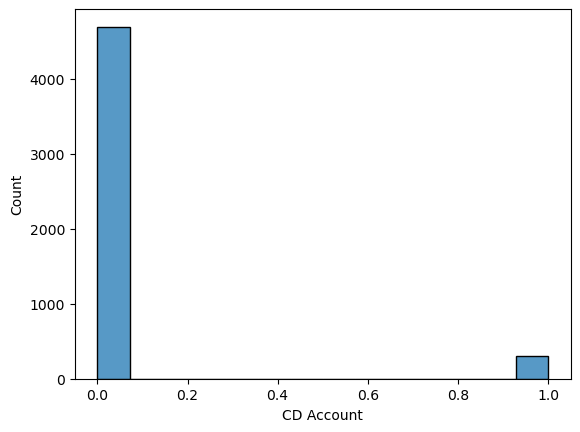

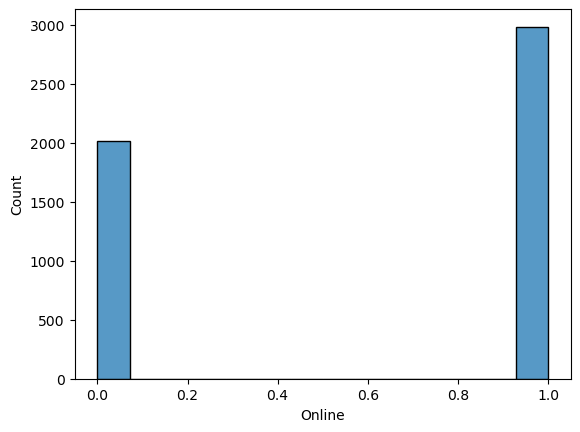

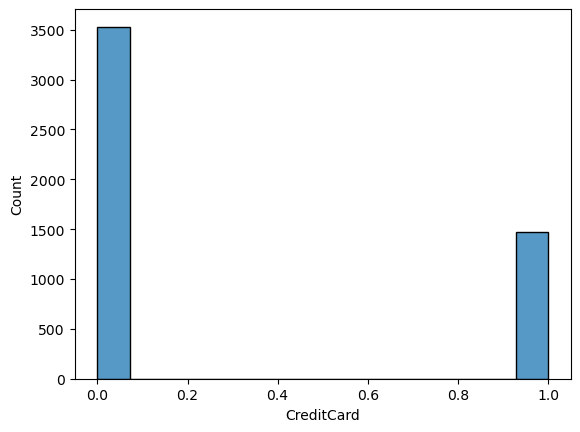

In [9]:
for col in loan_df.columns:
    plt.figure()
    sns.histplot(loan_df[f"{col}"])

In [10]:
loan_df.groupby(["Personal Loan","Mortgage"])["ID"].count()

Personal Loan  Mortgage
0              0           3150
               75             7
               76            11
               77             4
               78            15
                           ... 
1              587            1
               589            1
               590            1
               612            1
               617            1
Name: ID, Length: 446, dtype: int64

## Customer segmentation -Kmeans

In [11]:
from sklearn.cluster import KMeans

In [12]:
#Find the optimal number of cluster
winertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(loan_df)
    winertia.append(kmeans.inertia_)

C:\Users\judical\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\judical\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\judical\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\judical\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

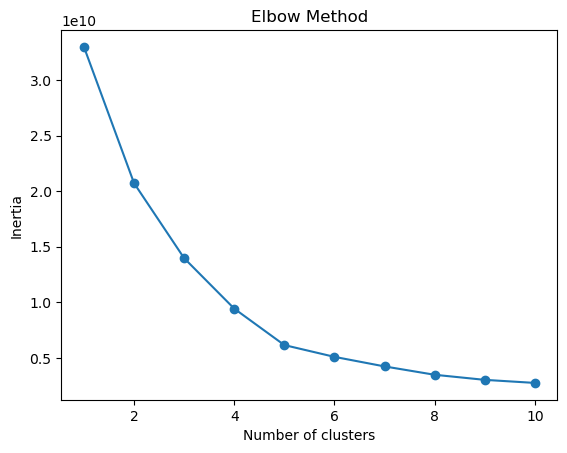

In [13]:
#Plot elbow
plt.plot(range(1,11),winertia,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
kmeans=KMeans(5,random_state=0)

In [15]:
kmeans.fit(loan_df)

C:\Users\judical\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [16]:
labels=kmeans.predict(loan_df)

In [17]:
centroids=kmeans.cluster_centers_

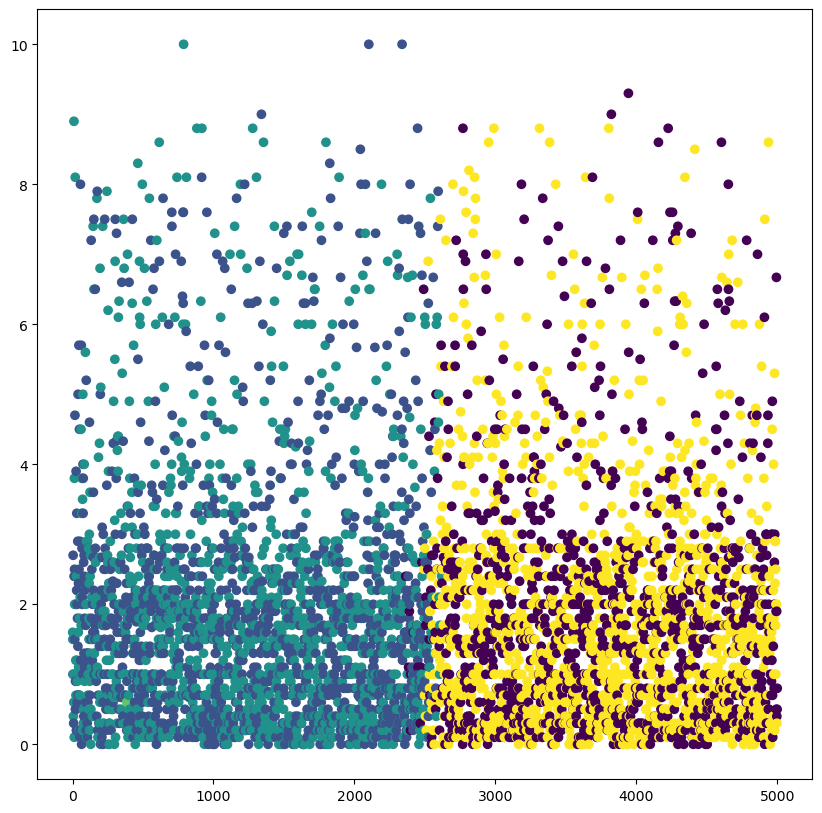

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(loan_df.iloc[:,0],loan_df.iloc[:,6],c=labels)

# 4. Machine Learning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## a- Data preparation

In [20]:
X=pd.concat([loan_df.iloc[:,1:9],loan_df.iloc[:,10:]],axis=1)
y=loan_df["Personal Loan"]

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

## b- Model setting up and evaluation 

In [22]:
models={
    "SGDClassifier":SGDClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression()
}

evaluations=[]

for model_name,model in models.items():
    evals={}
    ypred= model.fit(xtrain,ytrain).predict(xtest)
    evals["Accurracy"]= accuracy_score(ytest,ypred)
    evals["Precision"]= precision_score(ytest,ypred,pos_label=1)
    evals["Recall"]=recall_score(ytest,ypred,pos_label=1)
    evals["F1"]=f1_score(ytest,ypred,pos_label=1)
    evaluations.append(evals)

metrics=pd.DataFrame(evaluations,index=['SGDClassifier','Decision Tree Classifier','Logistic Regression'])
metrics

C:\Users\judical\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accurracy,Precision,Recall,F1
SGDClassifier,0.916,0.000000,0.000000,0.000000
Decision Tree Classifier,0.980,0.910256,0.845238,0.876543
Logistic Regression,0.908,0.437500,0.333333,0.378378


## c- Saving the model

In [23]:
import joblib

In [24]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [25]:
#saving 
joblib.dump(model,"model.pkl")

['model.pkl']

## d- Deployment with streamlit

In [26]:
#set up environment
!pip install streamlit

In [27]:
with open("app.py","w") as file:
    file.write("""
    import streamlit as st
    import joblib
    import numpy as np
    
    #load the model
    model=joblib.load(model.pkl)
    
    #Titleof the app
    st.title("Loan offer acceptance predictor")
    
    #Input fields
    input_data= st.text_input("Enter input data : CSV ")
    
    #Prediction Button
    if st.button("Predict"):
        input_array=np.array([float(i) for i in input_data.split(',')]).reshape(1,-1)
        
        #Make prediction
        prediction=model.predict(input_array)
        
        #Display prediction
        st.write(f"Prediction: {prediction[0]}")
    
    
    """)

In [30]:
with open("requirement.txt","w") as file:
    file.write("""
    streamlit
    joblib
    numpy
    scikit-learn
    """)

In [31]:
! code .